PREGUNTA SMART

¿De qué manera podemos desarrollar un modelo predictivo basado en datos históricos recolectados cada hora de consumo energético, temperatura y fecha de medicion, para estimar con un margen de error menor al 10% la demanda de energía en Cali para los siguientes 7 dias, permitiendo una mejor planificación y distribución del suministro?

Específica: Se centra en la predicción de la demanda energética en Cali semanal.
Medible: Se establece un margen de error menor al 5%.
Alcanzable: Usa datos históricos y variables relevantes.
Relevante: Facilita la planificación y distribución del suministro permite cumplir con las normas de regulatorias de distribucion de energia.
Temporal: El pronóstico es a 7 dias

In [1]:
#importamos las librerias para analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Cargamos el dataset desde un archivo .xlsx
df = pd.read_excel('Data/datasetEmcali_Imputacion.xlsx')

#mostramos las 5 primeras filas del dataset y las 5 ultimas
print(df.head(5))
print(df.tail(5))






ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [3]:
#mostramos la informacion del dataset
print(df.info())
#mostramos la descripcion del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             29520 non-null  datetime64[ns]
 1   TEMPERATURA       29520 non-null  float64       
 2   CONSUMO           29520 non-null  float64       
 3   DIA DE LA SEMANA  29520 non-null  int64         
 4   HORA              29520 non-null  int64         
 5   TIPO DE DIA       29520 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB
None


In [ ]:
#revisamos si hay datos duplicados
print(df.duplicated().sum())
#mostramos los datos duplicados y el cruce de filas duplicadas

print(df.describe())
#mostramos la cantidad de valores nulos
print(df.isnull().sum())

0
                     FECHA   TEMPERATURA       CONSUMO  DIA DE LA SEMANA  \
count                29520  29520.000000  29520.000000      29520.000000   
mean   2019-08-07 23:30:00     24.160133    455.574139          4.000813   
min    2017-12-01 00:00:00     16.100000    227.000000          1.000000   
25%    2018-10-04 11:45:00     21.800000    372.000000          2.000000   
50%    2019-08-07 23:30:00     23.600000    447.000000          4.000000   
75%    2020-06-10 11:15:00     26.400000    541.000000          6.000000   
max    2021-04-13 23:00:00     34.000000    676.000000          7.000000   
std                    NaN      3.185012     95.616579          2.001456   

               HORA  
count  29520.000000  
mean      11.500000  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000  
std        6.922304  
FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO 

In [5]:
#inputamos los valores nulos de temperatura con la temeraura de la fila anterior
df['TEMPERATURA'].fillna(method='ffill', inplace=True)
print(df.isnull().sum())

FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64


C:\Users\rchic\AppData\Local\Temp\ipykernel_23472\2299063562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TEMPERATURA'].fillna(method='ffill', inplace=True)
C:\Users\rchic\AppData\Local\Temp\ipykernel_23472\2299063562.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TEMPERATURA'].fillna(method='ffill', inplace=True)


In [ ]:
#eliminamos los valores nulos
df.dropna(inplace=True)
#mostramos la cantidad de valores nulos despues de eliminarlos
print(df.isnull().sum())



FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64


In [ ]:
print(df.describe())

                     FECHA   TEMPERATURA       CONSUMO  DIA DE LA SEMANA  \
count                29520  29520.000000  29520.000000      29520.000000   
mean   2019-08-07 23:30:00     24.160133    455.574139          4.000813   
min    2017-12-01 00:00:00     16.100000    227.000000          1.000000   
25%    2018-10-04 11:45:00     21.800000    372.000000          2.000000   
50%    2019-08-07 23:30:00     23.600000    447.000000          4.000000   
75%    2020-06-10 11:15:00     26.400000    541.000000          6.000000   
max    2021-04-13 23:00:00     34.000000    676.000000          7.000000   
std                    NaN      3.185012     95.616579          2.001456   

               HORA  
count  29520.000000  
mean      11.500000  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000  
std        6.922304  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             29520 non-null  datetime64[ns]
 1   TEMPERATURA       29520 non-null  float64       
 2   CONSUMO           29520 non-null  float64       
 3   DIA DE LA SEMANA  29520 non-null  int64         
 4   HORA              29520 non-null  int64         
 5   TIPO DE DIA       29520 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB
None


In [9]:
#convertimos la columna de fecha a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format="mixed")
#mostramos la informacion del dataset
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             29520 non-null  datetime64[ns]
 1   TEMPERATURA       29520 non-null  float64       
 2   CONSUMO           29520 non-null  float64       
 3   DIA DE LA SEMANA  29520 non-null  int64         
 4   HORA              29520 non-null  int64         
 5   TIPO DE DIA       29520 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB
None


,FECHA,TEMPERATURA,CONSUMO,DIA DE LA SEMANA,HORA,TIPO DE DIA
0,2017-12-01 00:00:00,27.9,409.0,5,0,ordinario
1,2017-12-01 01:00:00,29.0,387.0,5,1,ordinario
2,2017-12-01 02:00:00,29.1,378.0,5,2,ordinario
3,2017-12-01 03:00:00,28.2,370.0,5,3,ordinario
4,2017-12-01 04:00:00,26.7,364.0,5,4,ordinario
...,...,...,...,...,...,...
29515,2021-04-13 19:00:00,23.3,588.0,2,19,ordinario
29516,2021-04-13 20:00:00,23.3,567.0,2,20,ordinario
29517,2021-04-13 21:00:00,23.2,534.0,2,21,ordinario
29518,2021-04-13 22:00:00,23.1,493.0,2,22,ordinario


In [10]:

print(df.info())
#truncamos la columna fecha a solo la fecha
#df['FECHA'] = df['FECHA'].dt.date




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             29520 non-null  datetime64[ns]
 1   TEMPERATURA       29520 non-null  float64       
 2   CONSUMO           29520 non-null  float64       
 3   DIA DE LA SEMANA  29520 non-null  int64         
 4   HORA              29520 non-null  int64         
 5   TIPO DE DIA       29520 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB
None


In [11]:
df_grouped = df
#agrupamos por fecha y calculamos promedio de los valores e incluimos la fecha
# df_grouped = df.groupby('FECHA').mean().reset_index()
#Agrupar por fecha, promediar temperatura y sumar consumo
#df_grouped = df.groupby('FECHA').agg({'TEMPERATURA': 'mean', 'CONSUMO': 'sum'}).reset_index()
#convertimos la columna de fecha a tipo date
df_grouped['FECHA'] = pd.to_datetime(df_grouped['FECHA'])
#agrupamos df por numero de semana iso por año y calculamos promedio de los valores e incluimos la semana y el año

df_grouped['SEMANA'] = df_grouped['FECHA'].dt.isocalendar().week
df_grouped['ANIO'] = df_grouped['FECHA'].dt.isocalendar().year
df_grouped['MES'] = df_grouped['FECHA'].dt.month
#df_grouped['DIA_SEMANA'] = df_grouped['FECHA'].dt.dayofweek
#df_grouped['HORA'] = df_grouped['FECHA'].dt.hour
# Clasificar los días en 'ordinario', 'sábado' o 'domingo'
#df_grouped['CATEGORIA'] = df_grouped['DIA_SEMANA'].apply(lambda x: 'ordinario' if 1 <= x <= 5 else ('Saturday' if x == 6 else 'Sunday'))

#mostramos los valores unicos de CATEGORIA
print(df_grouped['TIPO DE DIA'].unique())
#mostramos la informacion del dataset
df_grouped


['ordinario' 'sábado' 'domingo']


,FECHA,TEMPERATURA,CONSUMO,DIA DE LA SEMANA,HORA,TIPO DE DIA,SEMANA,ANIO,MES
0,2017-12-01 00:00:00,27.9,409.0,5,0,ordinario,48,2017,12
1,2017-12-01 01:00:00,29.0,387.0,5,1,ordinario,48,2017,12
2,2017-12-01 02:00:00,29.1,378.0,5,2,ordinario,48,2017,12
3,2017-12-01 03:00:00,28.2,370.0,5,3,ordinario,48,2017,12
4,2017-12-01 04:00:00,26.7,364.0,5,4,ordinario,48,2017,12
...,...,...,...,...,...,...,...,...,...
29515,2021-04-13 19:00:00,23.3,588.0,2,19,ordinario,15,2021,4
29516,2021-04-13 20:00:00,23.3,567.0,2,20,ordinario,15,2021,4
29517,2021-04-13 21:00:00,23.2,534.0,2,21,ordinario,15,2021,4
29518,2021-04-13 22:00:00,23.1,493.0,2,22,ordinario,15,2021,4


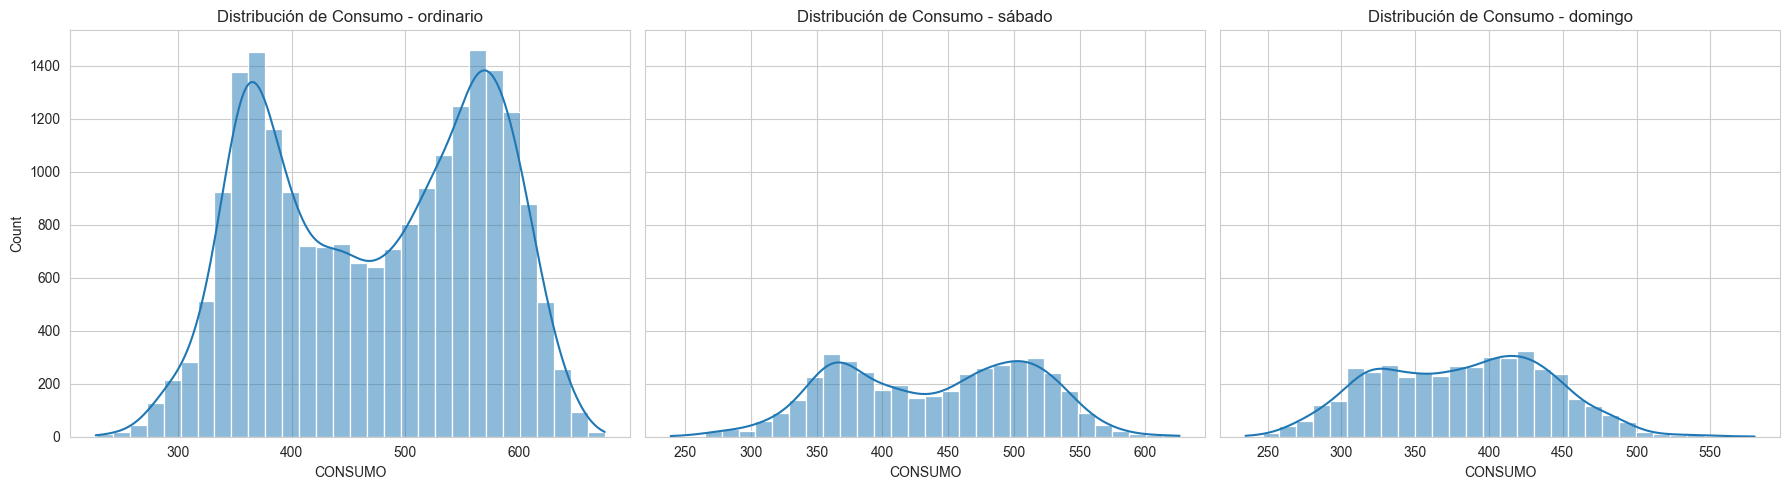

In [12]:
# Configuración de estilo
sns.set_style("whitegrid")

# Obtener los valores únicos de "TIPO DE DIA"
tipos_de_dia = df_grouped['TIPO DE DIA'].unique()
num_tipos = len(tipos_de_dia)

# Crear una figura con subgráficos en función de los tipos de día
fig, axes = plt.subplots(1, num_tipos, figsize=(6*num_tipos, 5), sharey=True)

# Si hay solo un tipo de día, convertir 'axes' en una lista para evitar errores
if num_tipos == 1:
    axes = [axes]

# Generar un histograma para cada "TIPO DE DIA"
for i, tipo in enumerate(tipos_de_dia):
    sns.histplot(df_grouped[df_grouped['TIPO DE DIA'] == tipo]['CONSUMO'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de Consumo - {tipo}')

# Ajustar diseño
plt.tight_layout()
plt.show()

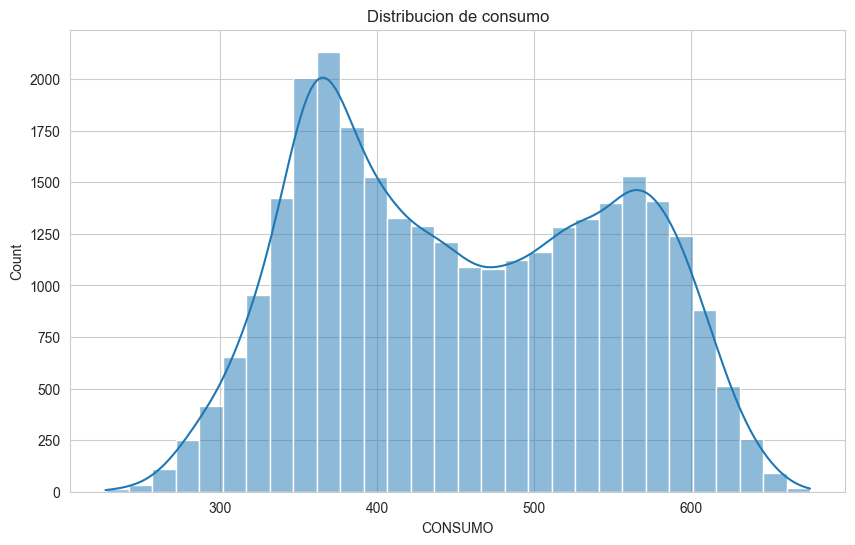

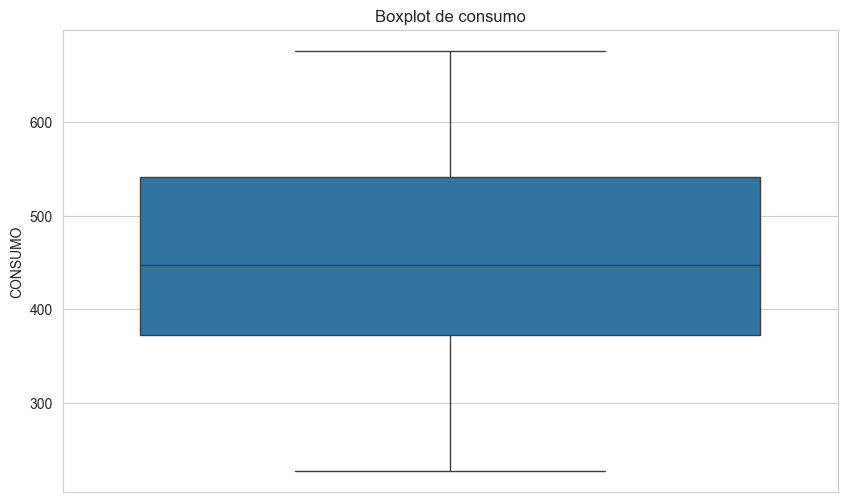

In [13]:
#hacemos una anlisis uni variado de la columna de consumo filtrando por la columan "TIPO DE DIA"




plt.figure(figsize=(10, 6))
sns.histplot(df_grouped['CONSUMO'], bins=30, kde=True)
plt.title('Distribucion de consumo')
plt.show()
#Ahora con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df_grouped['CONSUMO'])
plt.title('Boxplot de consumo')
plt.show()

Ahora analisis BiVariado

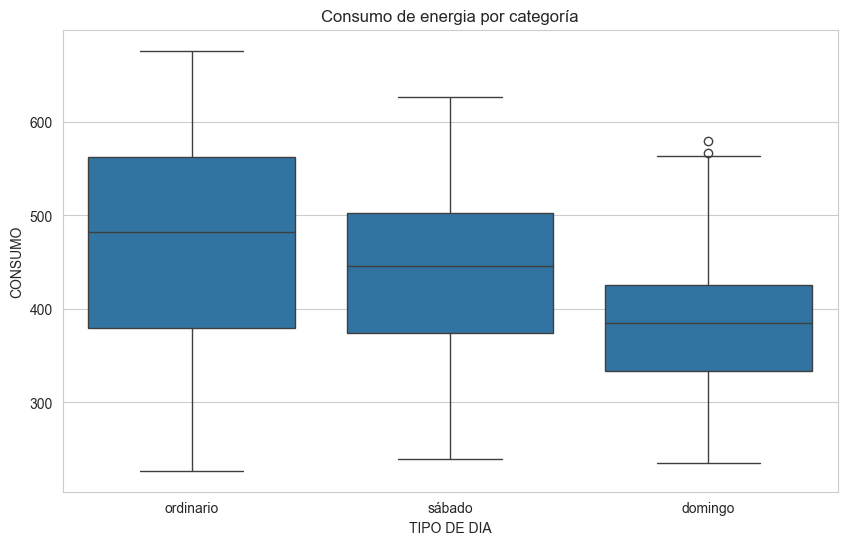

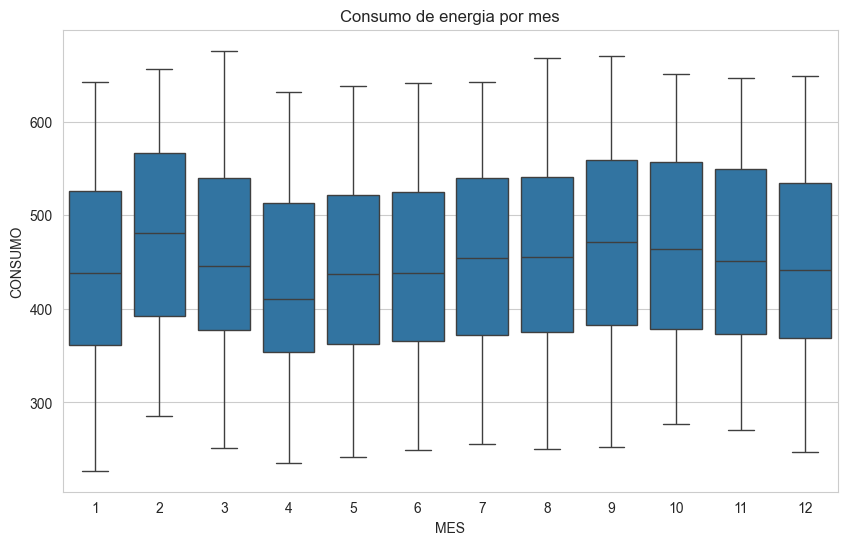

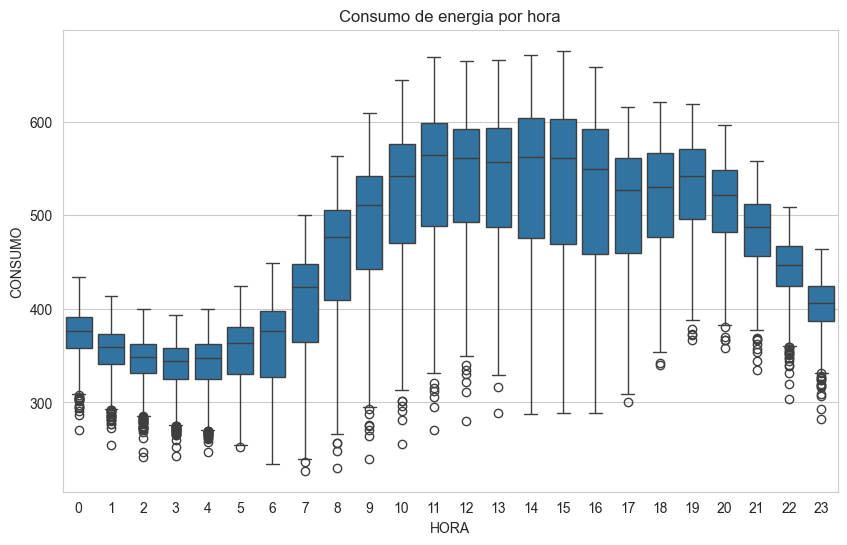

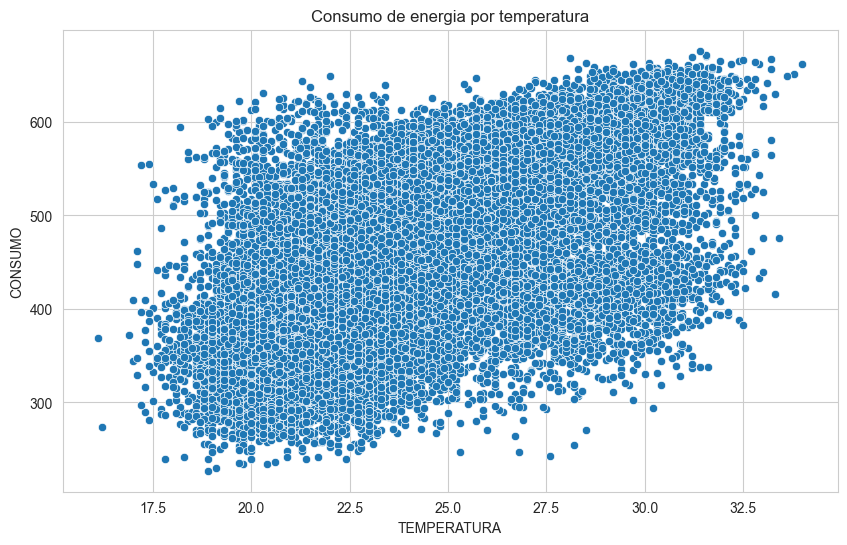

In [14]:
#Usamos las variables CONSUMO, TEMPERATURA para graficar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO DE DIA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por categoría')
plt.show()
#agrgamos consumo por mes
plt.figure(figsize=(10, 6))
sns.boxplot(x='MES', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por mes')
plt.show()
#agregamos consumo por hora
plt.figure(figsize=(10, 6))
sns.boxplot(x='HORA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por hora')
plt.show()
#agregamos consumo por temperatura
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMPERATURA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por temperatura')
plt.show()



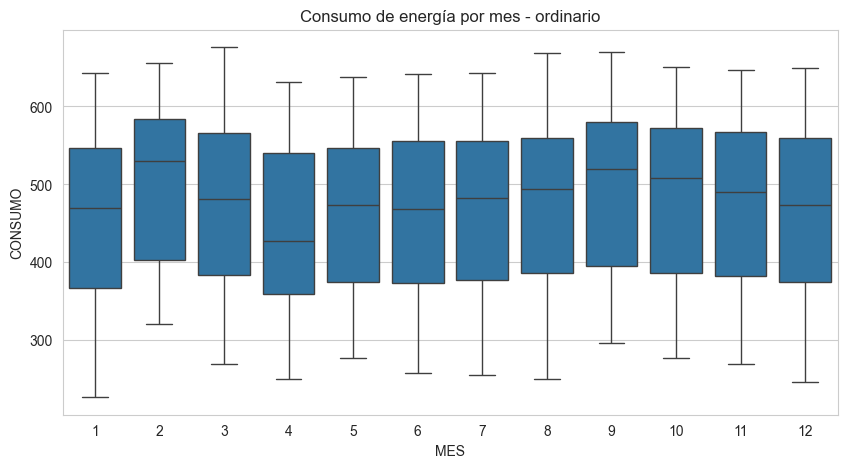

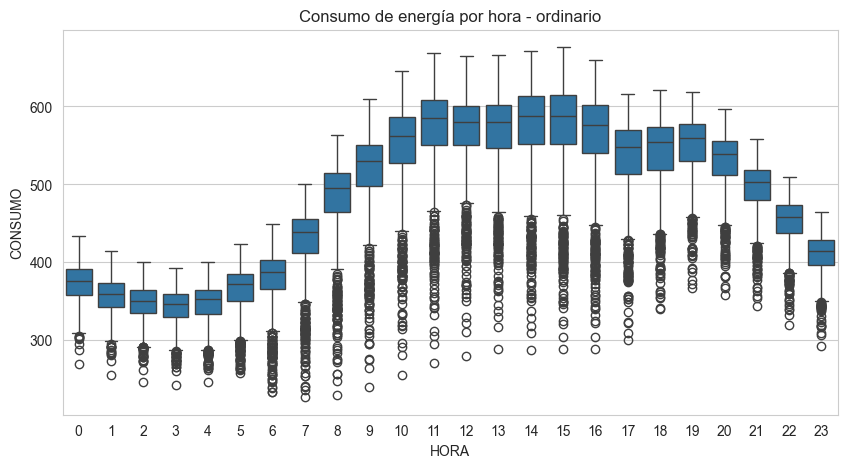

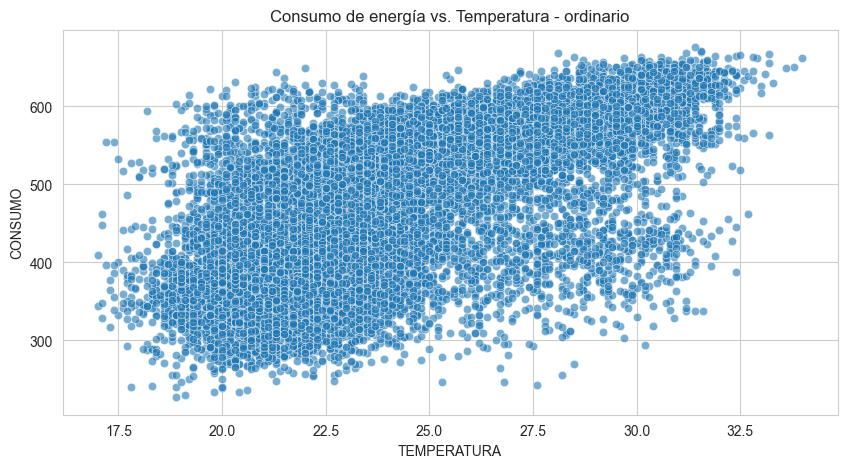

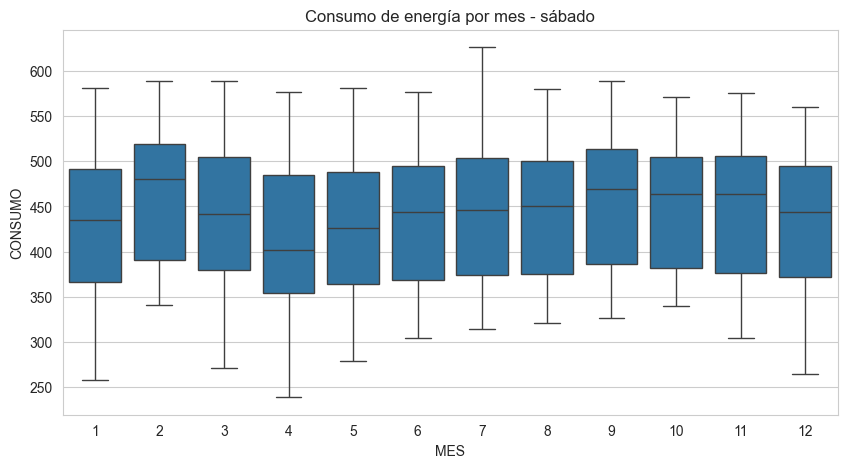

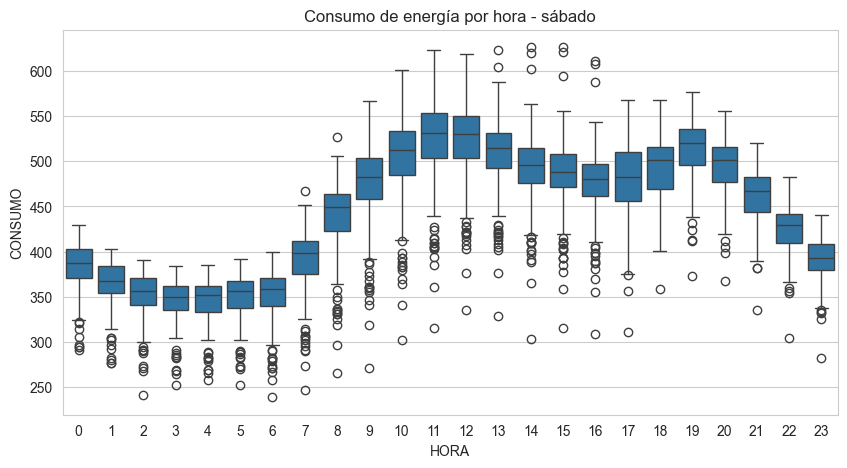

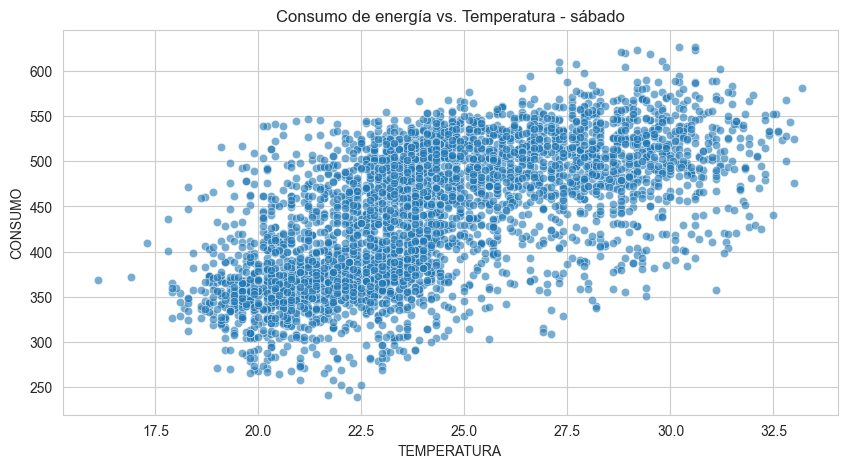

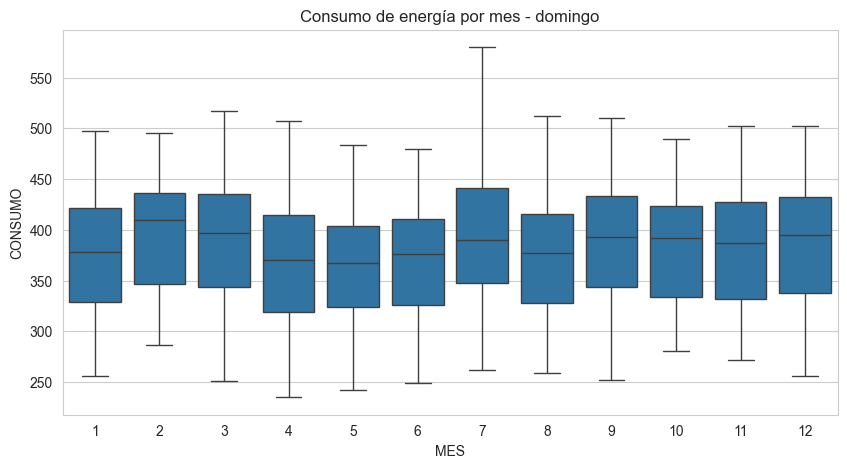

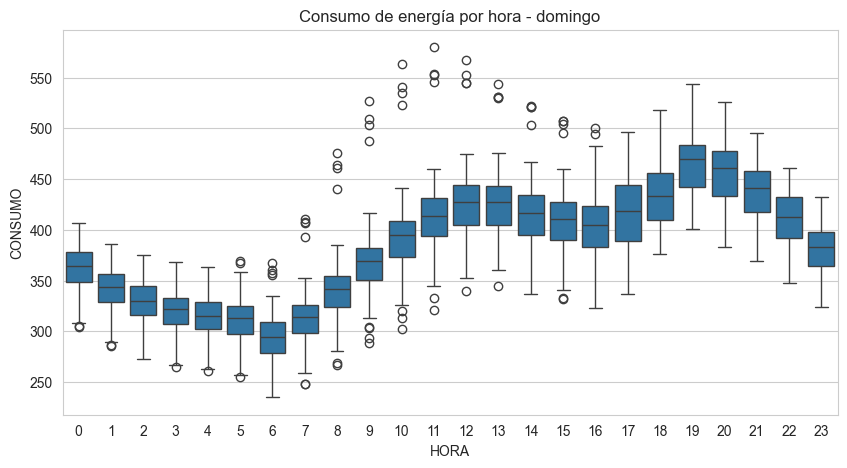

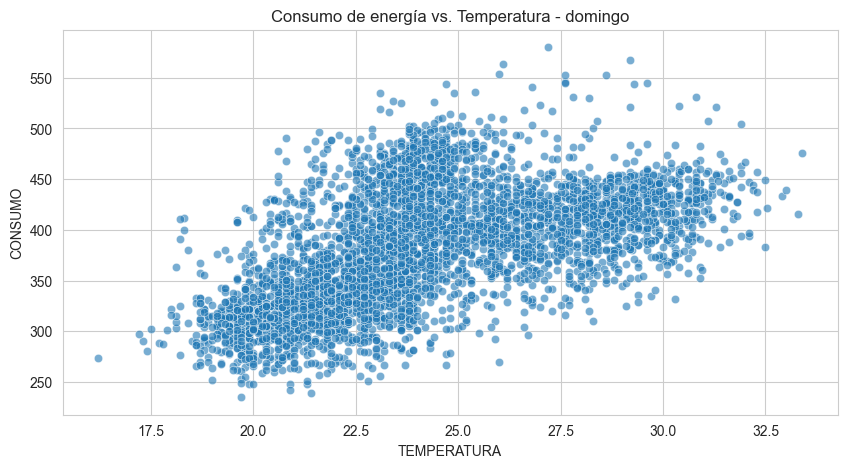

In [15]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")

# Obtener los valores únicos de "TIPO DE DIA"
tipos_de_dia = df_grouped['TIPO DE DIA'].unique()

# Crear gráficos para cada tipo de día
for tipo in tipos_de_dia:
    df_filtrado = df_grouped[df_grouped['TIPO DE DIA'] == tipo]  # Filtrar datos por tipo de día

    # 📌 Boxplot de Consumo por Mes
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='MES', y='CONSUMO', data=df_filtrado)
    plt.title(f'Consumo de energía por mes - {tipo}')
    plt.show()

    # 📌 Boxplot de Consumo por Hora
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='HORA', y='CONSUMO', data=df_filtrado)
    plt.title(f'Consumo de energía por hora - {tipo}')
    plt.show()

    # 📌 Scatterplot de Consumo por Temperatura
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='TEMPERATURA', y='CONSUMO', data=df_filtrado, alpha=0.6)
    plt.title(f'Consumo de energía vs. Temperatura - {tipo}')
    plt.show()

             TEMPERATURA   CONSUMO
TEMPERATURA     1.000000  0.588212
CONSUMO         0.588212  1.000000


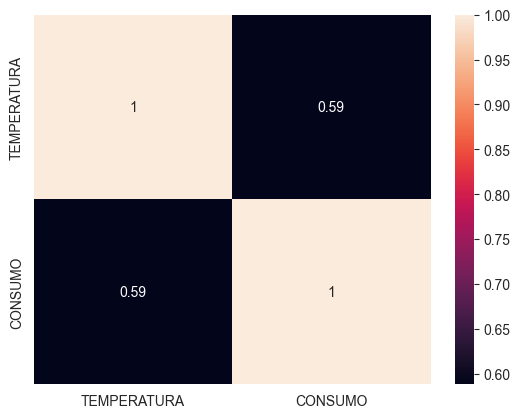

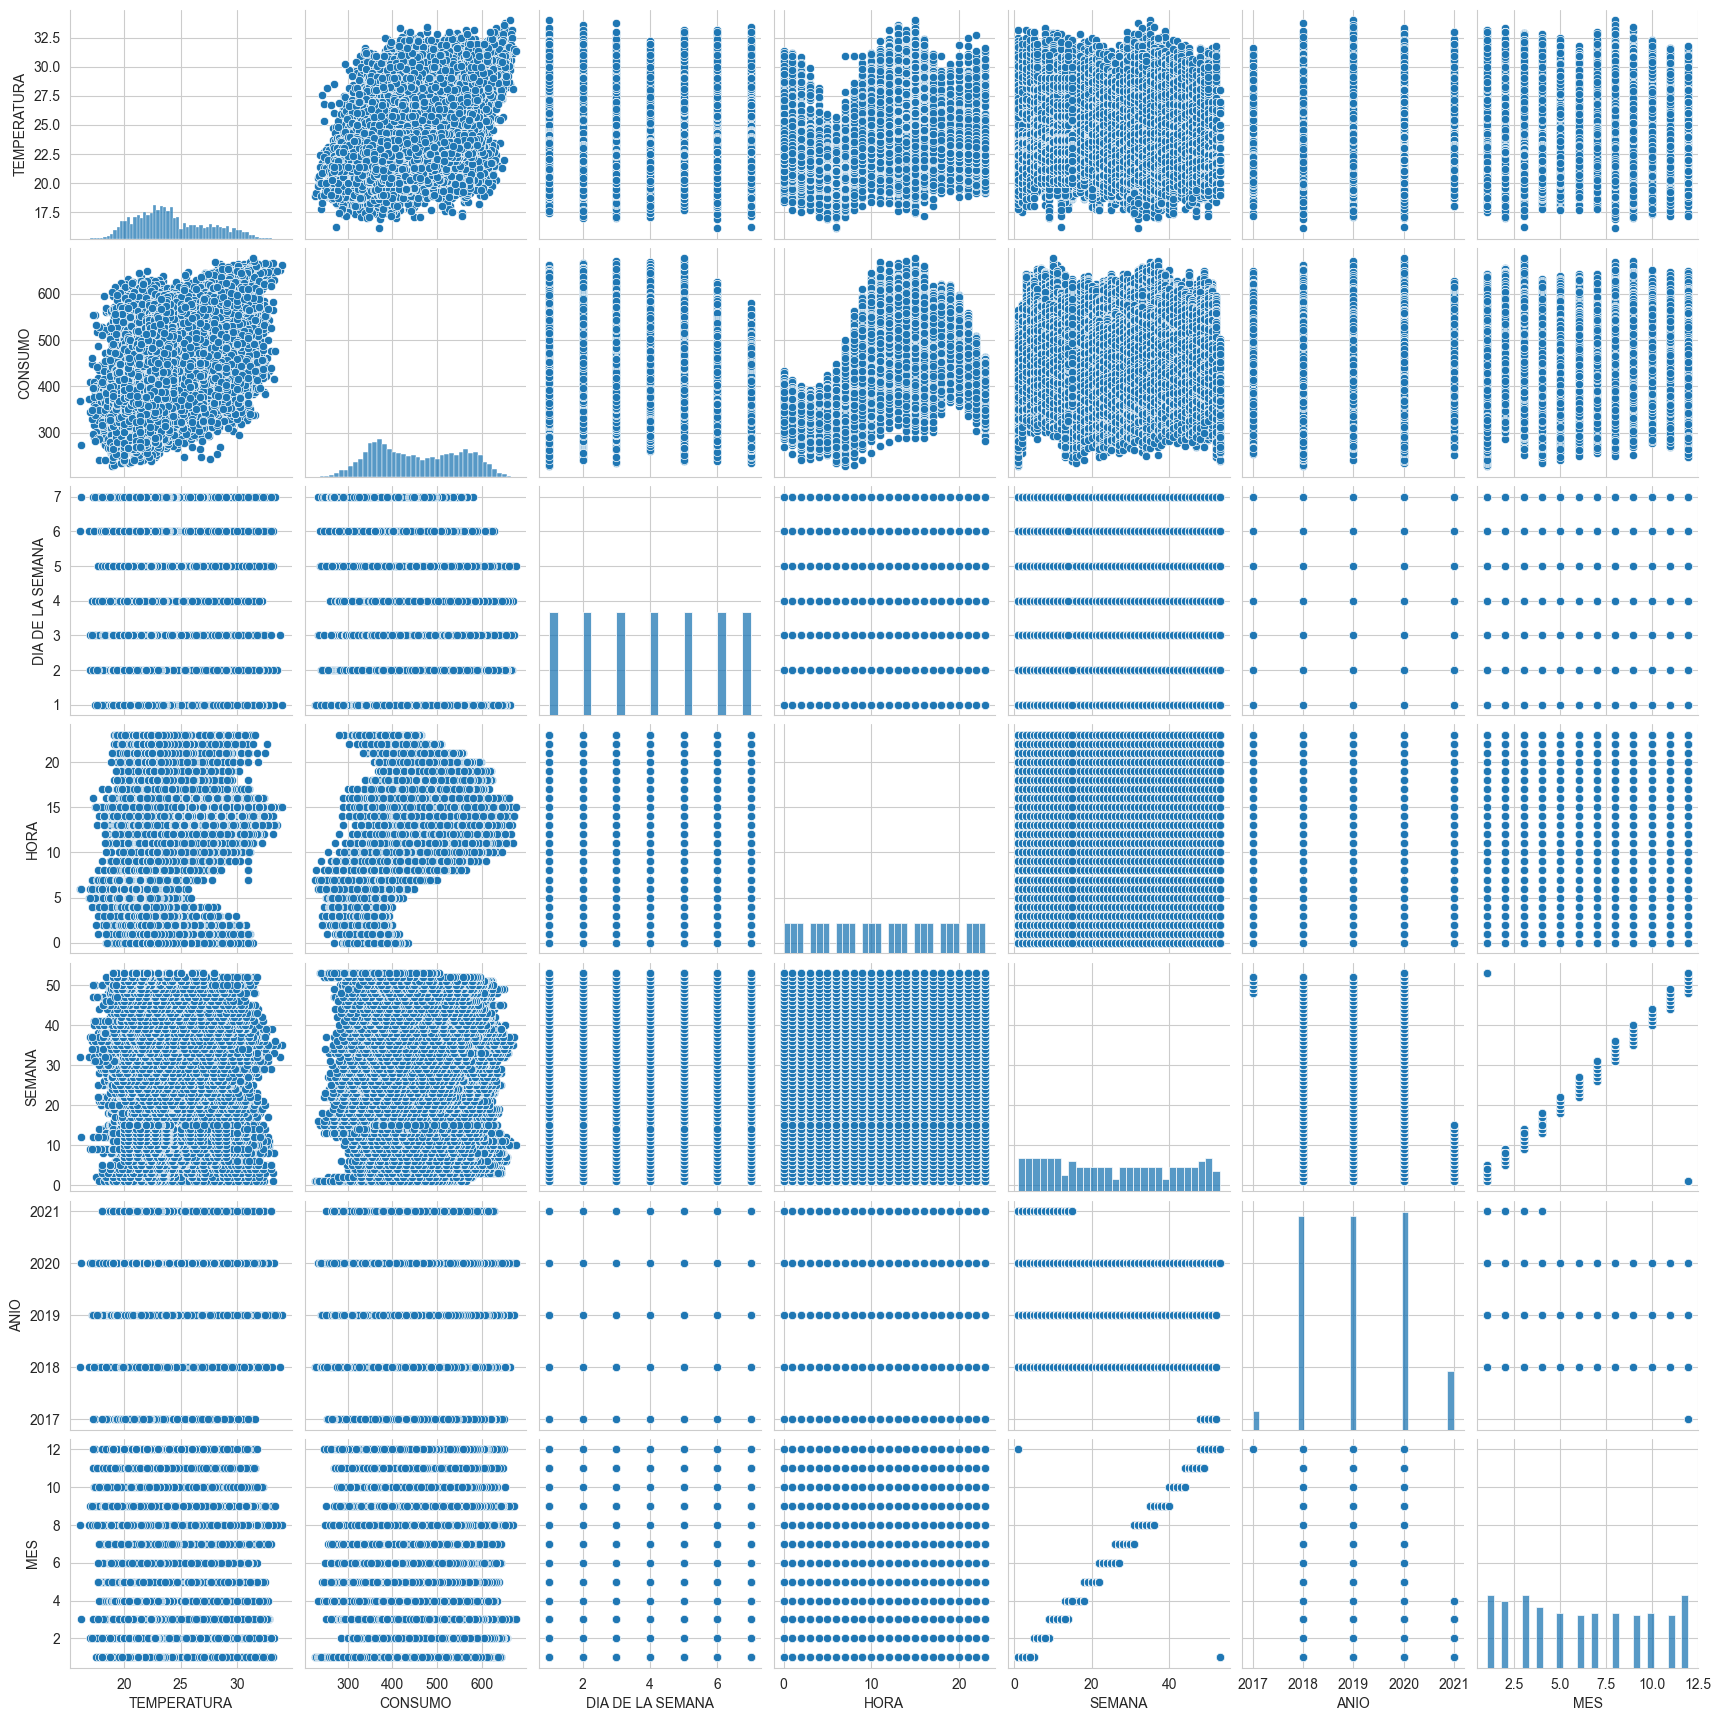

In [16]:
#calculamos la correlacion de las solo las variables temperatura, consumo y semana
correlation = df_grouped[['TEMPERATURA', 'CONSUMO']].corr()
#mostramos la correlacion
print(correlation)
#graficamos la correlacion
sns.heatmap(correlation, annot=True)
plt.show()
#graficamos la correlacion
sns.pairplot(df_grouped)
plt.show()

# NOTA PARA ENTENDER CONSUMO:
# La variable consumo tiene una periodicidad de 7 días, es recomendable hacer el
# análisis por cada ciclo (Lunes, Martes, Miércoles, Jueves, Viernes, Sábado,
# Domingo) Seria recomendable clasificar los datos por tipos de día (Ordinario,
# Sábado, Domingo, Festivo, Dia después de Festivo)
# Seria útil clasificar mes del año

In [17]:
#definimos un nuevo dataset a partir de df-grouped
df_test = df.drop('FECHA',axis=1)
print(df_test)


       TEMPERATURA  CONSUMO  DIA DE LA SEMANA  HORA TIPO DE DIA  SEMANA  ANIO  \
0             27.9    409.0                 5     0   ordinario      48  2017   
1             29.0    387.0                 5     1   ordinario      48  2017   
2             29.1    378.0                 5     2   ordinario      48  2017   
3             28.2    370.0                 5     3   ordinario      48  2017   
4             26.7    364.0                 5     4   ordinario      48  2017   
...            ...      ...               ...   ...         ...     ...   ...   
29515         23.3    588.0                 2    19   ordinario      15  2021   
29516         23.3    567.0                 2    20   ordinario      15  2021   
29517         23.2    534.0                 2    21   ordinario      15  2021   
29518         23.1    493.0                 2    22   ordinario      15  2021   
29519         23.0    450.0                 2    23   ordinario      15  2021   

       MES  
0       12  
1

In [18]:

# Diccionario para mapear números a nombres de días
dias_semana = {
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado',
    7: 'Domingo'
}

# Convertir la columna numérica a categórica
df_test['DIA DE LA SEMANA'] = df_test['DIA DE LA SEMANA'].map(dias_semana)
print(df_test)

       TEMPERATURA  CONSUMO DIA DE LA SEMANA  HORA TIPO DE DIA  SEMANA  ANIO  \
0             27.9    409.0          Viernes     0   ordinario      48  2017   
1             29.0    387.0          Viernes     1   ordinario      48  2017   
2             29.1    378.0          Viernes     2   ordinario      48  2017   
3             28.2    370.0          Viernes     3   ordinario      48  2017   
4             26.7    364.0          Viernes     4   ordinario      48  2017   
...            ...      ...              ...   ...         ...     ...   ...   
29515         23.3    588.0           Martes    19   ordinario      15  2021   
29516         23.3    567.0           Martes    20   ordinario      15  2021   
29517         23.2    534.0           Martes    21   ordinario      15  2021   
29518         23.1    493.0           Martes    22   ordinario      15  2021   
29519         23.0    450.0           Martes    23   ordinario      15  2021   

       MES  
0       12  
1       12  


In [19]:
# Normalizamos con OneHotEncoding el tipo de dia
df_encoded = pd.get_dummies(df_test, columns=['TIPO DE DIA','DIA DE LA SEMANA'])
print(df_encoded.head())



   TEMPERATURA  CONSUMO  HORA  SEMANA  ANIO  MES  TIPO DE DIA_domingo  \
0         27.9    409.0     0      48  2017   12                False   
1         29.0    387.0     1      48  2017   12                False   
2         29.1    378.0     2      48  2017   12                False   
3         28.2    370.0     3      48  2017   12                False   
4         26.7    364.0     4      48  2017   12                False   

   TIPO DE DIA_ordinario  TIPO DE DIA_sábado  DIA DE LA SEMANA_Domingo  \
0                   True               False                     False   
1                   True               False                     False   
2                   True               False                     False   
3                   True               False                     False   
4                   True               False                     False   

   DIA DE LA SEMANA_Jueves  DIA DE LA SEMANA_Lunes  DIA DE LA SEMANA_Martes  \
0                    False           

Error cuadrático medio: 500.1143295816974
R² Score: 0.9457680415002707


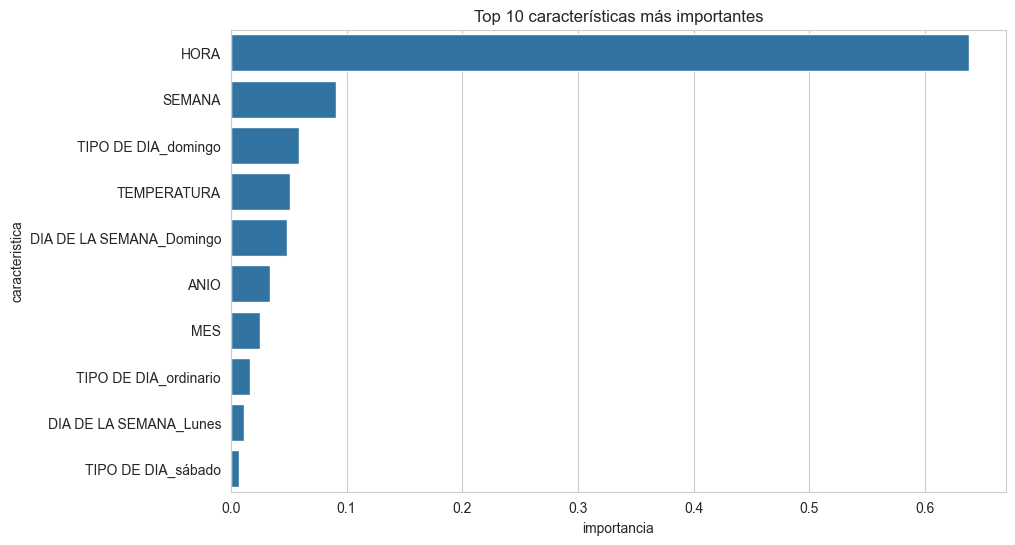

In [20]:
#aplicamos un modelo predictivo
# Separamos features y target
X = df_encoded.drop('CONSUMO', axis=1)
y = df_encoded['CONSUMO']

# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = rf_model.predict(X_test)

# Evaluamos el modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("R² Score:", r2)

# Visualizamos la importancia de las características
importancia = pd.DataFrame({
    'caracteristica': X.columns,
    'importancia': rf_model.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='caracteristica', data=importancia.head(10))
plt.title('Top 10 características más importantes')
plt.show()
